In [10]:
import os
import random

import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

from priorCVAE.priors import Matern12, Matern52, SquaredExponential
from priorCVAE.datasets import GPDataset

import jax.config as config
config.update("jax_enable_x64", True)

In [11]:
kernel = SquaredExponential()  # Matern12(), Matern52(), SquaredExponential()
n_samples = 5000
plot_ls = [0.1, 1.0]
x0 = 0
x1 = 1
n_data = 80

output_dir = r"outputs/"

In [12]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [13]:
x = jnp.linspace(x0, x1, n_data)    

In [14]:
gp_dataset = GPDataset(kernel=kernel, x=x, sample_lengthscale=False)

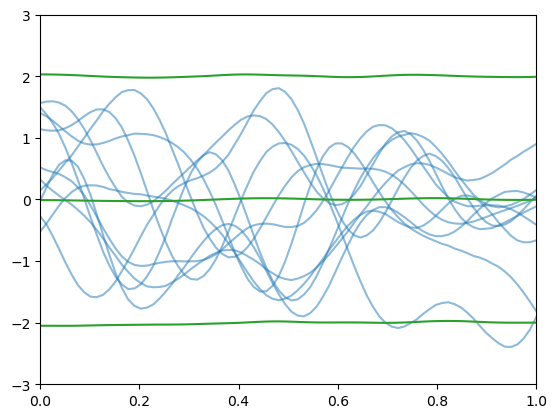

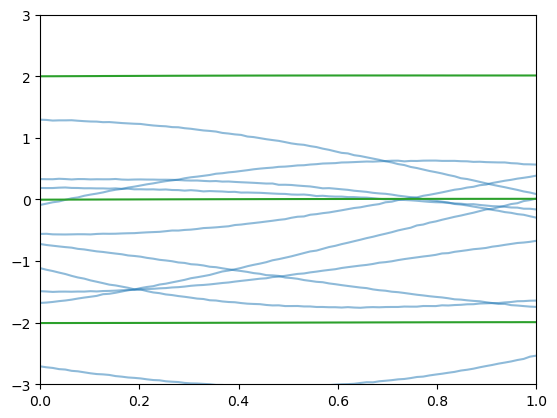

In [15]:
for i, ls in enumerate(plot_ls):
    key = jax.random.PRNGKey(random.randint(0, 9999))
    
    gp_dataset.kernel.lengthscale = ls
    _, gp_samples, _ = gp_dataset.simulatedata(n_samples)
    gp_samples_mean = jnp.mean(gp_samples, axis=0)
    gp_samples_std = jnp.std(gp_samples, axis=0)

    plt.clf()
    for s in gp_samples[:10]:
        plt.plot(x, s, c="tab:blue", alpha=0.5)
    
    plt.plot(x, gp_samples_mean, c="tab:green")
    plt.plot(x, gp_samples_mean + 2 * gp_samples_std, c="tab:green")
    plt.plot(x, gp_samples_mean - 2 * gp_samples_std, c="tab:green")
    
    plt.xlim([x[0], x[-1]])
    plt.ylim([-3, 3])
    plt.show()
    
    output_filename = f"GP_{type(kernel).__name__}_{str(ls).replace('.', '_')}.npz"
    output_file_path = os.path.join(output_dir, output_filename)
    
    jnp.savez(output_file_path, samples=gp_samples, samples_mean=gp_samples_mean, samples_std=gp_samples_std)